In [6]:
#Importar Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

sns.set_style('darkgrid')



In [14]:
#Cargamos la data y seleccionamos las variables a utilizar para el ejercicio
datos= pd.read_csv('datos_facebook.csv')
df = datos[['Total Interactions','Post Weekday','like','Post Hour']]
df


,Total Interactions,Post Weekday,like,Post Hour
0,100,4,79.0,3
1,164,3,130.0,10
2,80,3,66.0,3
3,1777,2,1572.0,10
4,393,2,325.0,3
...,...,...,...,...
495,84,7,53.0,2
496,75,5,53.0,8
497,115,5,93.0,2
498,136,4,91.0,11


In [10]:

datos = datos.replace(np.nan,"0")     #Reemplazar todos los valores NaN(tipo de dato que no se reconoce) con 0
#Genera variables a partir del dataframe
share = datos['share'].values
hour = datos['Post Hour'].values
days = datos['Post Weekday'].values
likes = datos['like'].values
interactions = datos['Total Interactions'].values

#Crear arreglo que va a contener las caracteristicas para la x
X=np.array([hour,days,interactions]).T
Y=np.array(likes)



In [11]:
#Definir el algoritmo a utilizar = regresion lineal
reg = LinearRegression()
#Entreno el modelo
reg = reg.fit(X,Y)
#Algoritmo para la prediccion
Y_pred = reg.predict(X)

In [33]:
#R^2 (coeficiente de determinación) nivel de eficacia del modelo, lo ideal es "1"
error = np.sqrt(mean_squared_error(Y,Y_pred))
r2 = reg.score(X,Y)
print("Error cuadratico medio es: ",error)   
print("El coeficiente de determinacion es: ",r2)
print("Los coeficientes son: ", reg.coef_)



Error cuadratico medio es:  21.8195386791525
El coeficiente de determinacion es:  0.9954323615919498
Los coeficientes son:  [ 0.21551007 -0.40017767  0.84787796]


In [28]:
#Realizando una Prediccion
hour = 20
days = 7
interactions = 400
print("Likes de la predicción: \n", reg.predict([[hour,days,interactions]]))

Likes de la predicción: 
 [338.36940719]


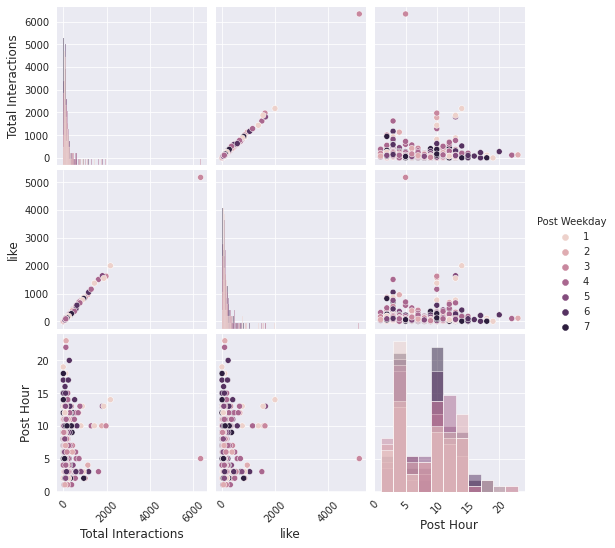

In [26]:
#Visualización grafica de las variables con sus datos 
g= sns.pairplot(df,hue='Post Weekday',diag_kind="hist")
for ax in g.axes.flat:
  plt.setp(ax.get_xticklabels(),rotation=45)